# Random Stock Market Analysis

This notebook analyzes random stock market dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


## Load Data


In [2]:
df = pd.read_csv('datasets/random_Stock_market/random_stock_market_dataset.csv')

print(f"Dataset shape: {df.shape}")
display(df.head(10))
print("\nDataset Info:")
df.info()
print("\nStatistical Summary:")
display(df.describe())


Dataset shape: (60, 6)


,Date,Open,High,Low,Close,Volume
0,2024-01-01,296.45,307.31,293.96,303.72,93133
1,2024-01-02,190.11,193.10,187.21,191.40,64993
2,2024-01-03,197.41,208.64,193.37,205.89,70326
3,2024-01-04,253.13,262.67,248.67,258.95,17358
4,2024-01-05,241.35,253.09,238.99,252.20,20847
5,2024-01-06,492.79,501.67,492.30,500.42,29000
6,2024-01-07,258.01,265.61,254.37,264.94,47481
7,2024-01-08,399.54,418.35,397.09,417.60,28766
8,2024-01-09,395.02,417.97,391.51,413.27,13193
9,2024-01-10,221.48,231.21,219.69,226.35,129565



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    60 non-null     object 
 1   Open    60 non-null     float64
 2   High    60 non-null     float64
 3   Low     60 non-null     float64
 4   Close   60 non-null     float64
 5   Volume  60 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB

Statistical Summary:


,Open,High,Low,Close,Volume
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,310.552000,322.589833,308.056833,320.412667,95405.516667
std,108.859051,109.095813,108.986426,109.157159,54895.342146
min,112.680000,123.780000,109.430000,121.270000,13193.000000
25%,222.957500,238.247500,220.042500,237.242500,48016.500000
50%,303.240000,313.800000,302.385000,309.385000,93850.500000
75%,396.150000,415.915000,392.905000,413.462500,130917.250000
max,492.790000,501.670000,492.300000,500.420000,195189.000000


## Data Preprocessing


In [3]:
date_col = next((col for col in df.columns if 'date' in col.lower()), None)
if date_col:
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(date_col)
    print(f"Date range: {df[date_col].min()} to {df[date_col].max()}")

# Check for stock names/symbols
name_cols = [col for col in df.columns if any(x in col.lower() for x in ['name', 'symbol', 'stock', 'ticker'])]
if name_cols:
    print(f"\nNumber of unique stocks: {df[name_cols[0]].nunique()}")
    print(f"\nTop 10 stocks by frequency:")
    print(df[name_cols[0]].value_counts().head(10))


Date range: 2024-01-01 00:00:00 to 2024-02-29 00:00:00


## Visualization


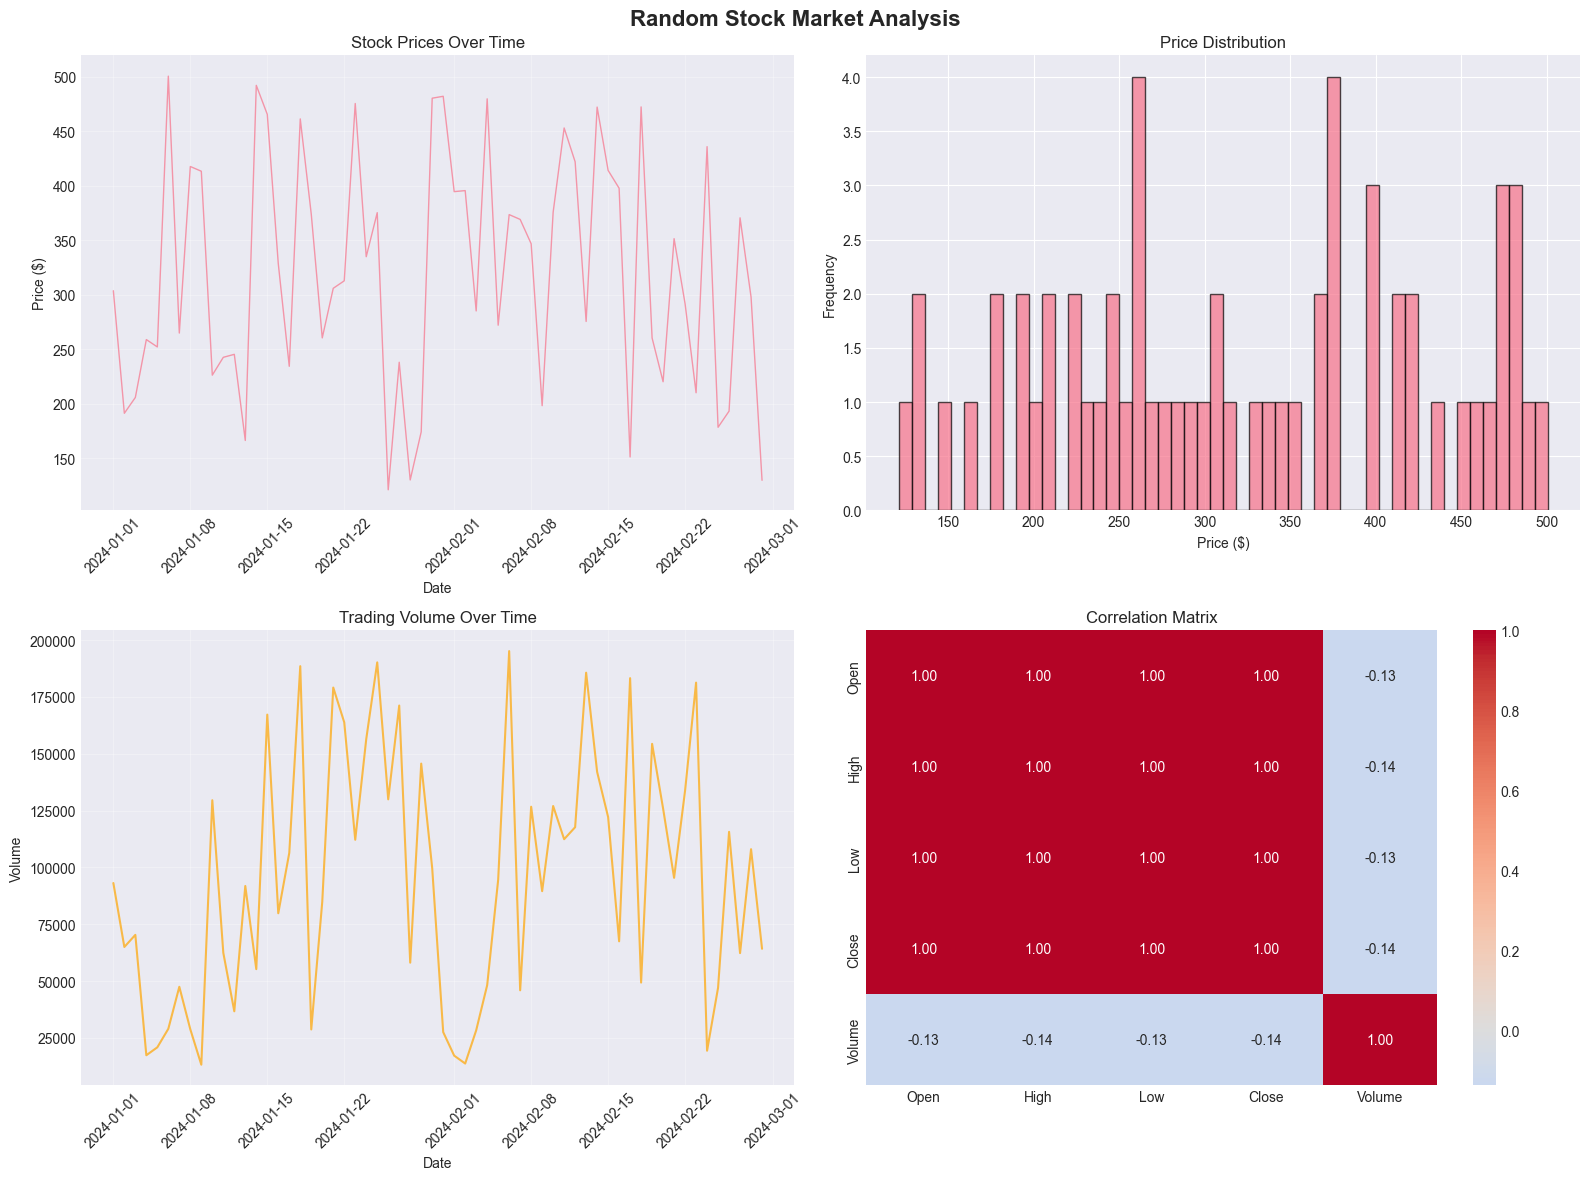

In [4]:
close_col = next((col for col in df.columns if 'close' in col.lower()), None)
volume_col = next((col for col in df.columns if 'volume' in col.lower()), None)
price_cols = [col for col in df.columns if any(x in col.lower() for x in ['open', 'high', 'low', 'close'])]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Random Stock Market Analysis', fontsize=16, fontweight='bold')

if date_col and close_col:
    axes[0, 0].plot(df[date_col], df[close_col], linewidth=1, alpha=0.7)
    axes[0, 0].set_title('Stock Prices Over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Price ($)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)

if close_col:
    axes[0, 1].hist(df[close_col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Price Distribution')
    axes[0, 1].set_xlabel('Price ($)')
    axes[0, 1].set_ylabel('Frequency')

if date_col and volume_col:
    axes[1, 0].plot(df[date_col], df[volume_col], alpha=0.7, color='orange')
    axes[1, 0].set_title('Trading Volume Over Time')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Volume')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)

numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    correlation = df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], center=0)
    axes[1, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


In [5]:
if close_col:
    print("=== Stock Market Summary ===")
    print(f"Total Records: {len(df)}")
    print(f"\nPrice Statistics:")
    print(f"  Average Price: ${df[close_col].mean():.2f}")
    print(f"  Median Price: ${df[close_col].median():.2f}")
    print(f"  Minimum Price: ${df[close_col].min():.2f}")
    print(f"  Maximum Price: ${df[close_col].max():.2f}")
    print(f"  Standard Deviation: ${df[close_col].std():.2f}")
    
    if date_col:
        print(f"\nDate Range: {df[date_col].min().strftime('%Y-%m-%d')} to {df[date_col].max().strftime('%Y-%m-%d')}")
    
    if volume_col:
        print(f"\nVolume Statistics:")
        print(f"  Average Volume: {df[volume_col].mean():,.0f}")
        print(f"  Total Volume: {df[volume_col].sum():,.0f}")


=== Stock Market Summary ===
Total Records: 60

Price Statistics:
  Average Price: $320.41
  Median Price: $309.38
  Minimum Price: $121.27
  Maximum Price: $500.42
  Standard Deviation: $109.16

Date Range: 2024-01-01 to 2024-02-29

Volume Statistics:
  Average Volume: 95,406
  Total Volume: 5,724,331
